# Project: Hotpot restaurant in Singapore

## Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import random

from IPython.display import Image
from IPython.core.display import HTML
from pandas.io.json import json_normalize

from bs4 import BeautifulSoup
import lxml

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

## Section1: Find out the best rating 

In [2]:
CLIENT_ID = '2H5EC114HKNFNQHQDV2WRD2ARJLMENJCONFFQ2IDTQFRJBDE' # your Foursquare ID
CLIENT_SECRET = 'IBV3YXW0YBUGLBI24EI1KP3TZF1UHM32RJS52LBZDFOORWJG' # your Foursquare Secret
VERSION = '20180604'
LIMIT =20000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2H5EC114HKNFNQHQDV2WRD2ARJLMENJCONFFQ2IDTQFRJBDE
CLIENT_SECRET:IBV3YXW0YBUGLBI24EI1KP3TZF1UHM32RJS52LBZDFOORWJG


In [3]:
from geopy.geocoders import Nominatim
address = 'Singapore'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

1.357107 103.8194992


In [4]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results['response']['venue'].keys())
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [5]:
search_query='hotpot'
radius=11000
print(search_query + '..finished!')

hotpot..finished!


In [14]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=2H5EC114HKNFNQHQDV2WRD2ARJLMENJCONFFQ2IDTQFRJBDE&client_secret=IBV3YXW0YBUGLBI24EI1KP3TZF1UHM32RJS52LBZDFOORWJG&ll=1.357107,103.8194992&v=20180604&query=hotpot&radius=11000&limit=20000'

In [15]:
results = requests.get(url).json()
venues = results['response']['venues']

In [16]:
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '52af0bd33cf9994f4e043bdd', 'name': 'H...",False,5a7af18ce2d4aa5fbaf54294,#06-01/02 Royal Square At Novena,SG,Singapore,Singapore,103 Irrawaddy Road,4857,[#06-01/02 Royal Square At Novena (103 Irrawad...,"[{'label': 'display', 'lat': 1.320415222096195...",1.320415,103.843131,Novena,329565,NaN,海底捞Hai Di Lao Hotpot,v-1589174924
1,"[{'id': '52af0bd33cf9994f4e043bdd', 'name': 'H...",False,5ad883bcb77c7759445a6d30,Seletar Mall,SG,Sengkang,Singapore,33 Sengkang West Ave,7364,"[Seletar Mall (33 Sengkang West Ave), 797653, ...","[{'label': 'display', 'lat': 1.39129143396973,...",1.391291,103.876157,NaN,797653,North East Community Development Region,Haidilao Hotpot,v-1589174924
2,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,5d667ab0d3702c0008fd6cf2,450 Lorong 6 Toa Payoh,SG,Toa Payoh,Singapore,NaN,4369,"[450 Lorong 6 Toa Payoh, 319394, Singapore]","[{'label': 'display', 'lat': 1.331691, 'lng': ...",1.331691,103.849418,NaN,319394,NaN,Jin Li Mala Hotpot 锦鲤时尚火锅 (Jin Li Mala Hotpot),v-1589174924
3,"[{'id': '52af0bd33cf9994f4e043bdd', 'name': 'H...",False,5b8e77ea7dc9e1002c751664,Century Square,SG,Tampines,Singapore,2 Tampines Central 5,13803,"[Century Square (2 Tampines Central 5), 529509...","[{'label': 'display', 'lat': 1.352483259717817...",1.352483,103.943450,NaN,529509,NaN,Hai Di Lao Hotpot 海底捞火锅 (Hai Di Lao Hotpot),v-1589174924
4,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,5caad6ee345cbe0039275a35,NaN,SG,Singapore,Singapore,NaN,6776,"[209945, Singapore]","[{'label': 'display', 'lat': 1.312025, 'lng': ...",1.312025,103.860411,Kallang,209945,NaN,Bai Wei Fragrant Hotpot,v-1589174924


In [19]:
filtered_columns=['name','location.formattedAddress','id','location.country','location.city','location.lat','location.lng']
df_fltr=dataframe.loc[:,filtered_columns]
df_fltr.columns=['name','address','ID','country','city','lat','lng']
df_fltr.head()

,name,address,ID,country,city,lat,lng
0,海底捞Hai Di Lao Hotpot,[#06-01/02 Royal Square At Novena (103 Irrawad...,5a7af18ce2d4aa5fbaf54294,Singapore,Singapore,1.320415,103.843131
1,Haidilao Hotpot,"[Seletar Mall (33 Sengkang West Ave), 797653, ...",5ad883bcb77c7759445a6d30,Singapore,Sengkang,1.391291,103.876157
2,Jin Li Mala Hotpot 锦鲤时尚火锅 (Jin Li Mala Hotpot),"[450 Lorong 6 Toa Payoh, 319394, Singapore]",5d667ab0d3702c0008fd6cf2,Singapore,Toa Payoh,1.331691,103.849418
3,Hai Di Lao Hotpot 海底捞火锅 (Hai Di Lao Hotpot),"[Century Square (2 Tampines Central 5), 529509...",5b8e77ea7dc9e1002c751664,Singapore,Tampines,1.352483,103.943450
4,Bai Wei Fragrant Hotpot,"[209945, Singapore]",5caad6ee345cbe0039275a35,Singapore,Singapore,1.312025,103.860411


In [22]:
filtered_col1=['name','ID','address']
df2=df_fltr.loc[:,filtered_col1]
df2.head()

,name,ID,address
0,海底捞Hai Di Lao Hotpot,5a7af18ce2d4aa5fbaf54294,[#06-01/02 Royal Square At Novena (103 Irrawad...
1,Haidilao Hotpot,5ad883bcb77c7759445a6d30,"[Seletar Mall (33 Sengkang West Ave), 797653, ..."
2,Jin Li Mala Hotpot 锦鲤时尚火锅 (Jin Li Mala Hotpot),5d667ab0d3702c0008fd6cf2,"[450 Lorong 6 Toa Payoh, 319394, Singapore]"
3,Hai Di Lao Hotpot 海底捞火锅 (Hai Di Lao Hotpot),5b8e77ea7dc9e1002c751664,"[Century Square (2 Tampines Central 5), 529509..."
4,Bai Wei Fragrant Hotpot,5caad6ee345cbe0039275a35,"[209945, Singapore]"


In [23]:
rating_col=['Name','ID','address','Likes','Rating','Tips']
rating_df=pd.DataFrame(columns=rating_col)
count=1
for row in df2.values.tolist():
    name,ID,address=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(df2),')','processed')
    rating_df = rating_df.append({'Name': name,
                                                'address': address, 
                                                'ID': id,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
rating_df.tail()

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'popular', 'seasonalHours', 'pageUpdates', 'inbox', 'parent', 'hierarchy', 'attributes', 'bestPhoto'])
                         ID                  Name  Likes  Rating  Tips
0  5a7af18ce2d4aa5fbaf54294  海底捞Hai Di Lao Hotpot     26     7.4    10
( 1 / 50 ) processed
dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'url', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'menu', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'seasonalHours', 'defaultHours', 'pageUpdates', 'inbox', 'parent', 'hierarchy', 'attributes', 'bestPhoto'])
      

,Name,ID,address,Likes,Rating,Tips
45,0,0,"[Koufu @ Cathay Cineleisure Orchard, 239695, S...",0,0.0,0
46,0,0,"[Blk 325, 120325, Singapore]",0,0.0,0
47,0,0,"[313 @ Orchard Food Republic, Singapore]",0,0.0,0
48,0,0,[#01-1048 People’s Park Complex Food Centre (3...,0,0.0,0
49,0,0,"[180 Kitchener Road (#04-18), 208539, Singapore]",0,0.0,0


In [24]:
rating_df.head()

,Name,ID,address,Likes,Rating,Tips
0,海底捞Hai Di Lao Hotpot,5a7af18ce2d4aa5fbaf54294,[#06-01/02 Royal Square At Novena (103 Irrawad...,26,7.4,10
1,Haidilao Hotpot,5ad883bcb77c7759445a6d30,"[Seletar Mall (33 Sengkang West Ave), 797653, ...",9,8.4,0
2,0,0,"[450 Lorong 6 Toa Payoh, 319394, Singapore]",0,0.0,0
3,0,0,"[Century Square (2 Tampines Central 5), 529509...",0,0.0,0
4,0,0,"[209945, Singapore]",0,0.0,0


In [52]:
rating_df.head(50)

,Name,ID,address,Likes,Rating,Tips
0,海底捞Hai Di Lao Hotpot,5a7af18ce2d4aa5fbaf54294,[#06-01/02 Royal Square At Novena (103 Irrawad...,26,7.4,10
1,Haidilao Hotpot,5ad883bcb77c7759445a6d30,"[Seletar Mall (33 Sengkang West Ave), 797653, ...",9,8.4,0
2,0,0,"[450 Lorong 6 Toa Payoh, 319394, Singapore]",0,0.0,0
3,0,0,"[Century Square (2 Tampines Central 5), 529509...",0,0.0,0
4,0,0,"[209945, Singapore]",0,0.0,0
5,0,0,"[#02-54 Bugis Junction (200 Victoria St), 1880...",0,0.0,0
6,DANRO Japanese Hotpot Place by MOF,50ceb8fae4b05a3ba6c8b41d,[#02-04/06 (Serangoon NEX (23 Serangoon Centra...,6,4.9,19
7,Chuan Wang Fu Spicy Hotpot 川王府火锅,4b275160f964a520db8524e3,[9 Teck Chye Terrace (Junction of Boundary Roa...,1,5.0,7
8,0,0,"[133 New Bridge Road #01-44 Chinatown Point, 0...",0,0.0,0
9,0,0,"[244R Upper Thomson Road, 574369, Singapore]",0,0.0,0


In [36]:
rating_df1=rating_df[rating_df.ID != 0].sort_values(by=['Rating'],ascending=False)

In [37]:
rating_df1.head(30)

,Name,ID,address,Likes,Rating,Tips
1,Haidilao Hotpot,5ad883bcb77c7759445a6d30,"[Seletar Mall (33 Sengkang West Ave), 797653, ...",9,8.4,0
38,Hai Di Lao Hot Pot,50ae28fde4b0062752d48b38,"[#02-04 Clarke Quay (3D River Valley Road), 17...",311,7.7,105
0,海底捞Hai Di Lao Hotpot,5a7af18ce2d4aa5fbaf54294,[#06-01/02 Royal Square At Novena (103 Irrawad...,26,7.4,10
34,Fragrant Hot Pot 飄香麻辣香鍋,4e0b04c745ddb226bd8a9ba6,"[313 @ Somerset, 313 Orchard Rd, 238895, Singa...",10,7.2,4
32,The Magic Of ChongQing Hot Pot 重慶火鍋館 (The Magi...,4b827a7ef964a520a1d430e3,"[#04-06/07, Tanglin Shopping Centre (19 Tangli...",18,6.1,12
22,Shabu Tontei Japanese Hotpot & Pork,4cf87dd9ce1da1cda662c8e1,"[#B1-79, NEX, 23 Serangoon Central, 556083, Si...",11,5.8,17
27,Chicken Hot Pot,4c42bf2bd691c9b6adda8e0a,"[#04-02A/B/C, Square 2 (10 Sinaran Dr), 307506...",6,5.8,10
12,Seoul Garden HotPot,5173969a498e64648c58b1b9,"[IMM Building, Singapore]",5,5.4,7
16,Seoul Garden HotPot,4d8497847e8ef04d6fd80dbe,"[#02-03/04, HarbourFront Centre (1 Maritime Sq...",16,5.3,27
7,Chuan Wang Fu Spicy Hotpot 川王府火锅,4b275160f964a520db8524e3,[9 Teck Chye Terrace (Junction of Boundary Roa...,1,5.0,7


## Section2: Find hotpot restaurants quantity and location in this island.

In [38]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=2H5EC114HKNFNQHQDV2WRD2ARJLMENJCONFFQ2IDTQFRJBDE&client_secret=IBV3YXW0YBUGLBI24EI1KP3TZF1UHM32RJS52LBZDFOORWJG&ll=1.357107,103.8194992&v=20180604&query=hotpot&radius=11000&limit=20000'

In [39]:
results = requests.get(url).json()
#Assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '52af0bd33cf9994f4e043bdd', 'name': 'H...",False,5a7af18ce2d4aa5fbaf54294,#06-01/02 Royal Square At Novena,SG,Singapore,Singapore,103 Irrawaddy Road,4857,[#06-01/02 Royal Square At Novena (103 Irrawad...,"[{'label': 'display', 'lat': 1.320415222096195...",1.320415,103.843131,Novena,329565,NaN,海底捞Hai Di Lao Hotpot,v-1589180149
1,"[{'id': '52af0bd33cf9994f4e043bdd', 'name': 'H...",False,5ad883bcb77c7759445a6d30,Seletar Mall,SG,Sengkang,Singapore,33 Sengkang West Ave,7364,"[Seletar Mall (33 Sengkang West Ave), 797653, ...","[{'label': 'display', 'lat': 1.39129143396973,...",1.391291,103.876157,NaN,797653,North East Community Development Region,Haidilao Hotpot,v-1589180149
2,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,5d667ab0d3702c0008fd6cf2,450 Lorong 6 Toa Payoh,SG,Toa Payoh,Singapore,NaN,4369,"[450 Lorong 6 Toa Payoh, 319394, Singapore]","[{'label': 'display', 'lat': 1.331691, 'lng': ...",1.331691,103.849418,NaN,319394,NaN,Jin Li Mala Hotpot 锦鲤时尚火锅 (Jin Li Mala Hotpot),v-1589180149
3,"[{'id': '52af0bd33cf9994f4e043bdd', 'name': 'H...",False,5b8e77ea7dc9e1002c751664,Century Square,SG,Tampines,Singapore,2 Tampines Central 5,13803,"[Century Square (2 Tampines Central 5), 529509...","[{'label': 'display', 'lat': 1.352483259717817...",1.352483,103.943450,NaN,529509,NaN,Hai Di Lao Hotpot 海底捞火锅 (Hai Di Lao Hotpot),v-1589180149
4,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",False,5caad6ee345cbe0039275a35,NaN,SG,Singapore,Singapore,NaN,6776,"[209945, Singapore]","[{'label': 'display', 'lat': 1.312025, 'lng': ...",1.312025,103.860411,Kallang,209945,NaN,Bai Wei Fragrant Hotpot,v-1589180149


In [40]:
dataframe.shape

(50, 18)

In [41]:
filtered_columns=['name','id','location.country','location.city','location.lat','location.lng']
df_fltr2=dataframe.loc[:,filtered_columns]
df_fltr2.columns=['name','id','country','city','lat','lng']
df_fltr2.head()

,name,id,country,city,lat,lng
0,海底捞Hai Di Lao Hotpot,5a7af18ce2d4aa5fbaf54294,Singapore,Singapore,1.320415,103.843131
1,Haidilao Hotpot,5ad883bcb77c7759445a6d30,Singapore,Sengkang,1.391291,103.876157
2,Jin Li Mala Hotpot 锦鲤时尚火锅 (Jin Li Mala Hotpot),5d667ab0d3702c0008fd6cf2,Singapore,Toa Payoh,1.331691,103.849418
3,Hai Di Lao Hotpot 海底捞火锅 (Hai Di Lao Hotpot),5b8e77ea7dc9e1002c751664,Singapore,Tampines,1.352483,103.943450
4,Bai Wei Fragrant Hotpot,5caad6ee345cbe0039275a35,Singapore,Singapore,1.312025,103.860411


In [42]:
map_singapore = folium.Map(location=[1.357107,103.8194992],zoom_start=10)

for lat,lng,country,city in zip(df_fltr2['lat'],df_fltr2['lng'],df_fltr2['country'],df_fltr2['city']):
    label = '{}, {}'.format(country,city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_singapore)
map_singapore

## Section3: Find cluster group

In [43]:
df_fltr2.dtypes

name        object
id          object
country     object
city        object
lat        float64
lng        float64
dtype: object

In [44]:
k=5
hotpot_clustering = df_fltr2.drop(['id','name','country','city'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(hotpot_clustering)
kmeans.labels_
df_fltr2.insert(0, 'Cluster Labels', kmeans.labels_)

In [45]:
# create map
map_clusters = folium.Map(location=[1.357107,103.8194992],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat,lng,city,cluster in zip(df_fltr2['lat'], df_fltr2['lng'], df_fltr2['city'], df_fltr2['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Section4:Find the region that has the most hotpot restaurants

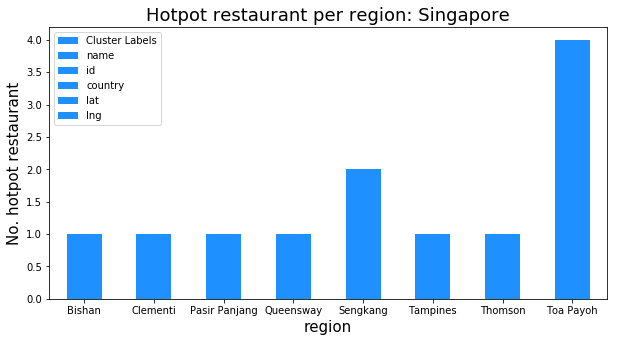

In [48]:
import matplotlib.pyplot as plt
df1=df_fltr2[df_fltr2.city !='Singapore']
clr = "dodgerblue"
df1.groupby('city').count().plot.bar(figsize=(10,5), color=clr)
plt.title('Hotpot restaurant per region: Singapore', fontsize = 18)
plt.xlabel('region', fontsize = 15)
plt.ylabel('No. hotpot restaurant',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

## Section5: Explore Trending Venues

In [49]:
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eb8f975216785001be00055'},
 'response': {'venues': []}}

In [50]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [51]:
# display trending venues
trending_venues_df

'No trending venues are available at the moment!'

## Conclusion

### The data shows the most favorite restaurant is “Hai DI Lao 海底捞”. This as expected. Hai Di Lao has the best service and food. Before pandemic they have plan to open more restaurants. After the pandemic, the rating table may change because some restaurant won’t survive. Anyway, during work from home, Hai Di Lao is still a best choice to order for home delivery.
